# Post Proccessing Quiz



In [20]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import flopy
%matplotlib inline  

Use the Freyberg modflow NWT model "../data/Freyberg_transient" to answer the following questions

Assume the model units are in meters and days 

Please make figures look simple, nice and proffesional 

In [13]:
model_ws = os.path.join('..','data','Freyberg_transient')
mf = flopy.modflow.Modflow.load('freyberg.nam',model_ws=model_ws,version='mfnwt',check=False)

## 1. Plot a colormap of the hydraulic conductivity in all three layers

Please show a colorbar, and label units

hint; the hydraulic conductivity is stored in the UPW package

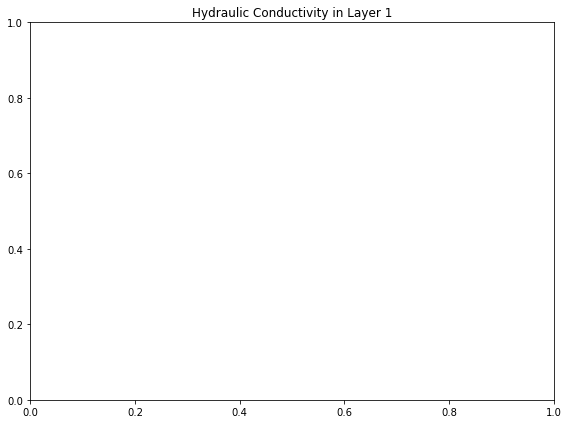

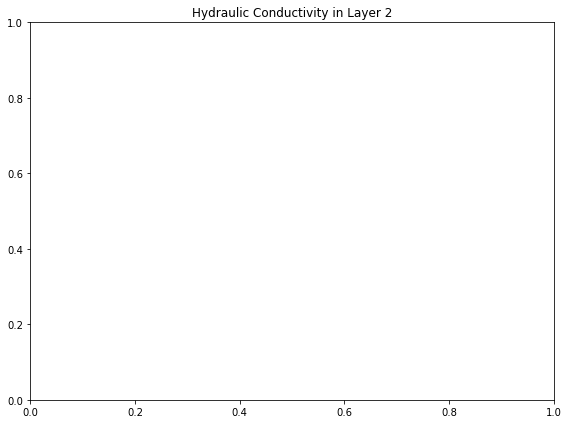

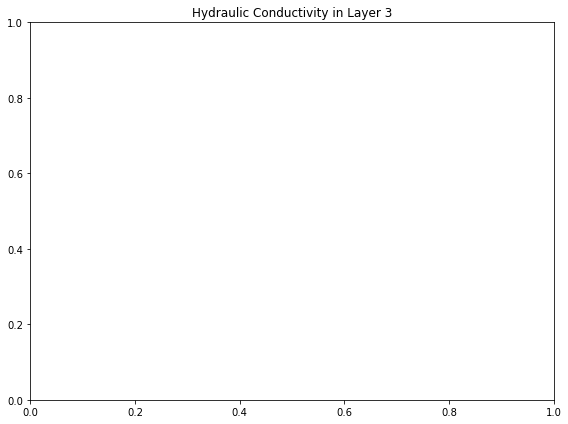

In [22]:
nlay = mf.dis.nlay
hk = mf.upw.hk.array
for lay in range(nlay):
    fig, ax = plt.subplots(figsize=(8,6))
    ### write your code here

    ax.set_title(f'Hydraulic Conductivity in Layer {lay+1}')
    fig.tight_layout()
    

## 2. Plot a hydrograph for each well below from 01/01/2016 - 01/01/2018

hint; heads are stored in the binary file freyberg.hds. Use the flopy function for reading such files - 
flopy.utils.HeadFile()

In [19]:
df = pd.DataFrame({'wellid': ['MW1', 'MW2', 'MW5', 'PW6'],
                   'layer': [1, 1, 1, 1],
                   'row': [9, 24, 18, 34],
                   'column': [9, 7, 16, 12],
                   'top_screen':[10,13.5,9.825,-15],
                   'bot_screen':[7.5,10,6.425,-20]})

df

,wellid,layer,row,column,top_screen,bot_screen
0,MW1,1,9,9,10.000,7.500
1,MW2,1,24,7,13.500,10.000
2,MW5,1,18,16,9.825,6.425
3,PW6,1,34,12,-15.000,-20.000


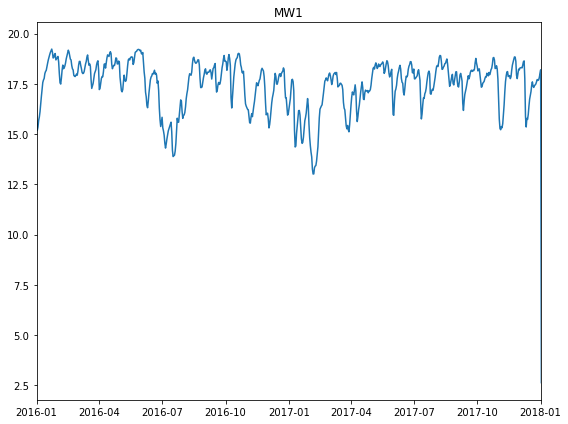

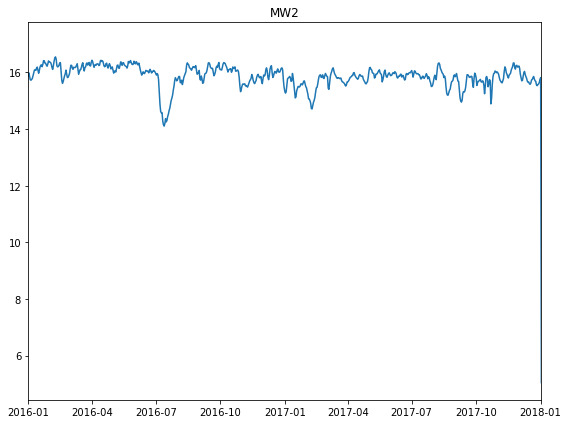

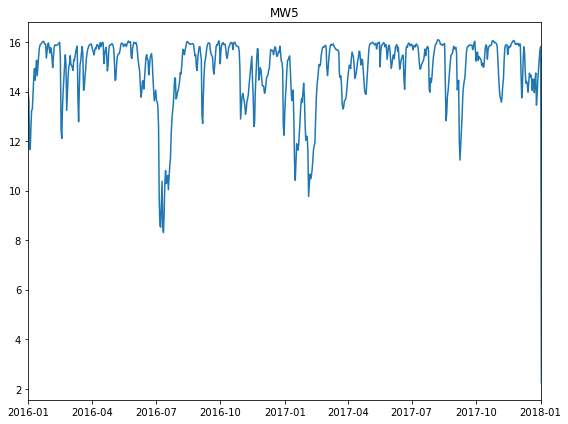

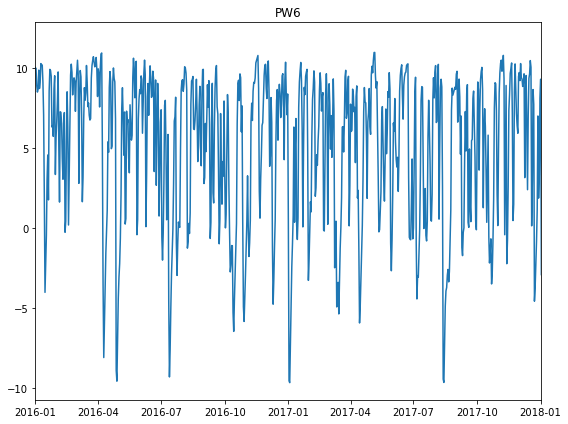

In [21]:
hdsobj = flopy.utils.HeadFile(os.path.join(model_ws,'freyberg.hds'))
start_datetime = pd.to_datetime(mf.modeltime.start_datetime)
for i, dfrow in df.iterrows():
    l, r, c = dfrow['layer'], dfrow['row'], dfrow['column']

    fig, ax = plt.subplots(figsize=(8,6))
    ### write your code here

    ts = hdsobj.get_ts(idx=(l-1,r-1,c-1))
    times = ts[:,0]
    dates = [start_datetime+pd.to_timedelta(day,unit='d') for day in times]
    hds = ts[:,1]

    ax.plot(dates, hds)

    ax.set_title(dfrow['wellid'])
    ax.set_xlim([pd.to_datetime('01/01/2016'),pd.to_datetime('01/01/2018')])
    fig.tight_layout()